# Go through ALL TODO's!!
# Be sure imported everything when needed!
# TODO: have a more "Advanced" section? with additional options?


<a id='top'></a>
# Contents:
* [Color Schemes](#color_schemes)
* [Various Plots](#plots)
* [Gene Diagram](#gene_diagram)
* [Additional Useful Methods](#etc)


In [ ]:
# import required packages
from matplotlib import cm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


<a id='color_schemes'></a>
# Color Schemes
A good site to pick color schemes: https://learnui.design/tools/data-color-picker.html#palette
### Diverging color Schemes

['#6b6ecf', '#9c9ede', '#8ca252', '#cedb9c', '#bd9e39', '#e7ba52', '#843c39', '#d6616b', '#7b4173', '#ce6dbd']


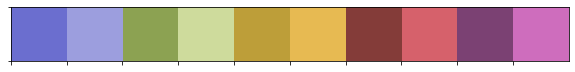

In [652]:
# original SARS-CoV-2 genomic coloring
exn_cols = (np.linspace(0.1,0.9,10))
print(sns.color_palette(plt.cm.tab20b(exn_cols)).as_hex())
sns.palplot(plt.cm.tab20b(exn_cols))

['#91560d', '#c58e3d', '#e7cf94', '#f6eed9', '#dbefec', '#98d7cd', '#44a299', '#066b63']


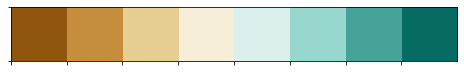

In [654]:
# built-in diverging color scheme
print(sns.color_palette("BrBG",8).as_hex())
sns.palplot(sns.color_palette("BrBG",8).as_hex())

['#246aae', '#529dc8', '#a7d0e4', '#e1edf3', '#fae7dc', '#f7b799', '#dc6e57', '#b61f2e']


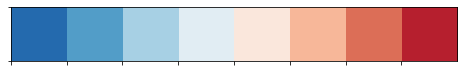

In [655]:
# built-in diverging color scheme
print(sns.color_palette("RdBu_r",8).as_hex())
sns.palplot(sns.color_palette("RdBu_r",8).as_hex())

['#668fe4', '#93b0ec', '#c2d2f4', '#f2f2f2', '#bbdec2', '#80c08e', '#47a35a']


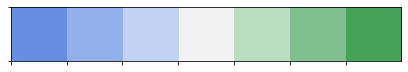

In [662]:
# custom diverging color scheme 
print(sns.diverging_palette(255, 133, l=60, n=7).as_hex())
sns.palplot(sns.diverging_palette(255, 133, l=60, n=7).as_hex())

['#668fe4', '#4f6aa1', '#37435c', '#222222', '#2d4933', '#3a7647', '#47a35a']


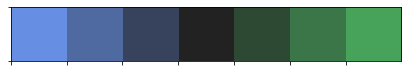

In [663]:
# custom diverging color scheme - dark center
print(sns.diverging_palette(255, 133, l=60, n=7, center="dark").as_hex())
sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark").as_hex())

### Gradient Color Schemes

['#0ac49f', '#32ceaf', '#5bd7bf', '#83e1ce', '#abebde', '#d4f5ee', '#fcfefe']
['#8b41b0', '#7d4fae', '#6f5eac', '#616caa', '#527ba9', '#4489a7', '#3697a5', '#28a6a3', '#1ab4a1', '#0cc29f']
['#003f5c', '#2a4264', '#53466d', '#7d4975', '#a64c7e', '#d05086', '#dc5f6f', '#e47055', '#ec813a', '#f59220', '#fda305']
['#b00ac4', '#6760dd', '#1db6f6', '#47ceba', '#b2c34e', '#ffaf07', '#ff8420', '#ff5939']
['#00e8ba', '#20b6ae', '#3f84a2', '#5f5196']


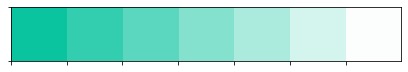

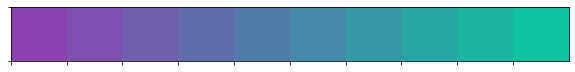

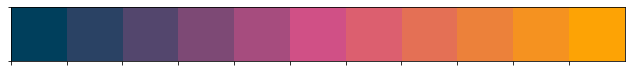

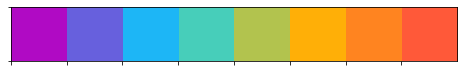

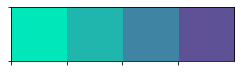

In [682]:
def make_gradient_color_scheme(size,color_ls):
    '''
    Output list of hex colors for color scheme also displays a plot of the color pallette 
    Inputs:
        size = number of colors in color scheme
        color_ls = list of colors to be used in making gradient
            * can be any length < size
            * if only one color is given other color in gradient will be set to white)
    '''
    norm = matplotlib.colors.Normalize(-1,1)
    
    if len(color_ls) == 1:
        color_ls.append("#ffffff")
    grad_cols = [[norm(-1.0), color_ls[0]] ] # first already determined
    if len(color_ls)>len(grad_cols)-1:
        i=1
        while i<len(color_ls)-1: 
            grad_cols.append([norm( i*(2/(len(color_ls)-1))+(-1)), color_ls[i]])
            i+=1
    grad_cols.append([norm(1.0), color_ls[-1]]) # last already determined
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", grad_cols)
    hex_cols = []
    for i in range(cmap.N): 
        if i%int(cmap.N/size)==0: # cmp1.N is 256 
            rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
            hex_cols.append(matplotlib.colors.rgb2hex(rgb))
    print(hex_cols)
    sns.palplot(hex_cols)

# Create color scheme from 1 color
make_gradient_color_scheme(6,['#0ac49f'])  
# Create color scheme from 2 colors
make_gradient_color_scheme(9,["#8b41b0",'#0ac49f'])
# Create color scheme from 3 colors
make_gradient_color_scheme(10,["#003f5c",'#d45087','#ffa600'])  
# Create color scheme from 4 colors
make_gradient_color_scheme(7,["#b00ac4",'#03d5ff','#ffbb00','#ff553b'])  
# Create color scheme from 2 colors
make_gradient_color_scheme(4,["#00e8ba",'#7e208a'])    
    


<a id='plots'></a>
# Various Plot Types
## Bar
## Box and Whisker
## Scatter Plot
## Histogram
## Alignment Diagram
## Weight Matrix


<a id='gene_diagram'></a>
# Gene Diagram

In [402]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib



class GeneImage(object):
    def __init__(self, total_span, exon_intervals, exon_colors=[], marker_pos=[], marker_colors=[], homology_list=[]):
        '''
        **Required Inputs**
        
        total_span
            type: integer
            * length of the gene to be plotted (number of nucleotides)
                Ex: total_span = 4560 # will draw gene of length 4560 nucleotides
                
                NOTE: all exon intervals must be within position 1 to total_span
                NOTE: this script currently only supports two overlapping exons
                
        exon_intervals
            type: 2D list of integers
            * List of start and end positions (in nucleotides) of exons
                Ex: exon_intervals = [[266, 567],[756, 800]] 
                   # will draw two exons: the first starting at position 266 and ending at position 567, the second starting at 756 and ending at position 800
            
            NOTE: put exon intervals in order (from first to last numerically) in this list to prevent issues with coloring properly
            
        **Optional Inputs**
        
        marker_pos
            type: list of integers
            * positions (in nucleotides) of where to put the marker (arrows) within the exon intervals # TODO: update if fix this
            Ex: marker_positions = [874,956,2290] # will place arrows at positions 874,956, and 2290 in the gene diagram
            
            NOTE: marker positions must be within the exon intervals
        
        exon_colors
            type: list of Strings (colors)
            * provide a list of colors to color each exon
            * if no colors are provided will set them automatically
            NOTE: length of exon_colors must equal length of exon_intervals
            
        marker_colors 
            type: list of Strings (colors)
            * To set all marker colors to a single color:
                Set this value to a list of length 1 containing that color
                
                Ex: marker_colors = ["blue"] # will set all marker colors to blue
                
            * To set some markers to a specific color:
                Create a list of colors that is the same length as your list of marker_pos, change the color of
                the value in the list position that corridnates with the marker position.
                
                Ex: marker_colors = ["grey","grey","red","grey","green","red"], marker_pos = [8744,6059,2290,9679,11594,8201] # all markers but the 3rd and 5th marker will be grey, the 3rd marker will be red, the fifth marker will be blue
        
        homologyList
            type: list of integers
            * list of integer values from 0 to 100 indicating the homology to be used for coloring arrows by homology
                A value of 0 indicates 0% homology at that position
                A value of 100 indicates 100% homology at that position
                
            NOTE: length of homology list must be the same as the length for marker_pos 
            
            
        Method modified from: https://gist.github.com/parashardhapola/e095e3ebd068c90e7089b53e46b8e0bc
        Original Author: Parashar Dhapola
        '''
        
        # sort exon_intervals
        exon_intervals.sort()
        
        self.totalSpan = total_span # user input
        self.exonIntervals = exon_intervals # user input
        
        self.markerPositions = marker_pos # optional input
        self.markerColors = marker_colors # optional input 
        self.homologyList = homology_list # optional input
        self.exonColors = exon_colors # optional input
        
        self.exonOverlay = self._find_exon_overlap(self.exonIntervals)
        
        self.markerHeights = []
        self.markerSize = 200
        self.MarkerWeight = 1.5
        self.exonColor = "black"
        self.intronColor = "black"
        self.maxGrad = "#00bfc9"
        self.intronWeight = 0
        self.intronStyle = '-'
        self.barColor= "black"
        self.bgColor = "white"
        self.markerDefaultColor = '#858585'
        self.markerEdgeDefaultColor = "black"
        self.numExons = len(self.exonIntervals)
        self.minExonLen = self.totalSpan*0.005
        self.ylims = {'exon_max': 2, 'exon_min':1}
        self.figure, self.canvas = plt.subplots(figsize=(30,5))
        self.canvas.set_facecolor(self.bgColor)
        self._draw()

    def _set_limits(self):
        self.ylims['intron_max'] = self.ylims['exon_max']*0.25
        self.ylims['intron_min'] = (self.ylims['exon_max'] + self.ylims['exon_min'])/2.0
        self.ylims['bar_min'] = self.ylims['exon_max']-0.6
        self.ylims['bar_max'] = self.ylims['bar_min']+(self.ylims['exon_max']-self.ylims['exon_min'])/5.0
        
    def _find_exon_overlap(self,exon_intervals):
        # takes a SORTED list of exon_intervals and looks for overlapping exons to ensure properly staggered in the diagram
        exon_overlap_ls = [0] # keeps track of overlapping exons, if 0, no overlap, >1 indicates number of overlaps
        exon_overlap_ct = 0
        # start at 2nd exon
        i = 1
        exon_end_pos = exon_intervals[0][-1]
        while i<len(exon_intervals):
            # look for overlap in the exon with the previous exon
            # overlap if this intron's start position is less than the previous intron's end position
            if (exon_intervals[i][0] < exon_end_pos):
                # exons overlap
                exon_overlap_ct+=1
                # new exon_end_pos will be set if this exon ends past previous
                exon_end_pos = max(exon_end_pos,exon_intervals[i][-1])
            else:
                # no overlap
                exon_overlap_ct = 0 # resets the count (in event it increased from previous exons)
                exon_end_pos = exon_intervals[i][-1]
            exon_overlap_ls.append(exon_overlap_ct)
            i+=1

        # Update exon intervals list to accomodate any overlaps
        #    For any overlaps puts largest exon in the back (positions it so largest exon is first in updated_exon_intervals list)
        updated_exon_intervals = []
        i = 0
        while i<len(exon_intervals):
            # check if exon has an overlap (if value is greater than 0 there is an overlap)
            if exon_overlap_ls[i] > 0: 
                # look at previous exon and see if it is larger if so make it first in updated_exon_intervals
                if ((exon_intervals[i-1][0]-exon_intervals[i-1][-1])>(exon_intervals[i][0]-exon_intervals[i][-1])):
                    # swap positions in updated_exon_intervals list:
                    # update previous position to current
                    updated_exon_intervals[-1] = exon_intervals[i]
                    # update current position to previous 
                    updated_exon_intervals.append(exon_intervals[i-1])
                else:
                    updated_exon_intervals.append(exon_intervals[i])
            else:
                updated_exon_intervals.append(exon_intervals[i])
            i+=1
        
        self.exonIntervals = updated_exon_intervals #  updates exon intervals
        return exon_overlap_ls
                
    
    def _transform_spans(self):
        span_lens = [x[1]-x[0] for x in self.exonIntervals]
        max_len = float(max(span_lens))
        transformed_intervals = []
        if max_len < self.minExonLen:
            span_ratios = [x/max_len for x in span_lens]
            expansion_factor = self.totalSpan*1e-11
            for i in range(1,10):
                ef = (2**i)*expansion_factor
                if max_len+ef > self.minExonLen:
                    expansion_factor = ef
                    break
            for i,j in zip(self.exonIntervals, span_ratios):
                mid = (i[0] + i[1])/2
                f = (expansion_factor*j)/2
                if mid+f - mid-f > self.minExonLen:
                    transformed_intervals.append([mid-f, mid+f])
                else:
                    transformed_intervals.append([mid-(self.minExonLen/2), mid+(self.minExonLen/2)])
        else:
            for i in range(self.numExons):
                if span_lens[i] < self.minExonLen:
                    mid = (self.exonIntervals[i][0] + self.exonIntervals[i][0])/2 
                    transformed_intervals.append([mid-(self.minExonLen/2), mid+(self.minExonLen/2)])
                else:
                    transformed_intervals.append(self.exonIntervals[i])
        self.exonIntervals = transformed_intervals[:]
        
    def _draw_exon(self, span,col):
        self.canvas.fill_between(span, self.ylims['exon_min']+.2, self.ylims['exon_max']-.2,
                                 edgecolor=self.bgColor, facecolor=col)
        return True
    
    def _draw_staggered_exon(self, span,col):
        self.canvas.fill_between(span, self.ylims['exon_min']-.1+.2, self.ylims['exon_max']-.1-.2,
                                 edgecolor=self.bgColor, facecolor=col)
        return True
        
    def _draw_intron(self, span):
        mid = (span[0]+span[1])/2.0
        self.canvas.plot([span[0], mid], [self.ylims['intron_min'], self.ylims['intron_max']],
                         c=self.intronColor, lw=self.intronWeight, ls=self.intronStyle)
        self.canvas.plot([mid, span[1]], [self.ylims['intron_max'], self.ylims['intron_min']],
                         c=self.intronColor, lw=self.intronWeight, ls=self.intronStyle)
        return True
    
    def _draw_markers(self):
        if self.markerHeights == []:
            self.markerHeights = [self.ylims['exon_max']-self.ylims['exon_min'] for x in self.markerPositions]
        if self.markerColors == []:
            self.markerColors = [self.markerDefaultColor for x in self.markerPositions]
        if self.homologyList == []:
            cmp1 = matplotlib.colors.LinearSegmentedColormap.from_list("", self.markerColors)
            self.canvas.scatter(self.markerPositions, [x+0.84 for x in self.markerHeights], 
                c = self.markerColors,
                s=self.markerSize, marker='v', cmap=cmp1,
                linewidths=1,edgecolors=self.markerEdgeDefaultColor, alpha=1)
        else:
            # If user inputs a list of homology values then will color arrows by homology with a color gradient
            norm = matplotlib.colors.Normalize(-1,1)
            grad_colrs = [[norm(-1.0), "white"],[norm( 1.0), self.maxGrad]]
            cmp1 = matplotlib.colors.LinearSegmentedColormap.from_list("", grad_colrs)
            # NOTE: 0.84 was an arbitrary number selected to ensure arrow labels show up at correct point on Exon bars
            self.canvas.scatter(self.markerPositions, [x+0.84 for x in self.markerHeights], 
                    # homology list
                    c = self.homologyList,
                    s=self.markerSize, marker='v', cmap=cmp1,
                    linewidths=1,edgecolors=self.markerEdgeDefaultColor, alpha=1)
    
    def _clean_axes(self):
        self.canvas.set_yticks([], [])
        self.canvas.get_xaxis().tick_top()
        self.canvas.tick_params(axis='x', direction='out')
        self.canvas.set_xticks([])
        for o in ["top", "bottom", "left", "right"]:
            self.canvas.spines[o].set_visible(False)
        min_pos = 0
        if min_pos < 0:
            min_pos = 0
        max_pos = self.totalSpan#int(self.exonIntervals[-1][1] + self.totalSpan * 0.1)
        minortick_pos = [int(x) for x in range(0, self.totalSpan, int((0-self.totalSpan)/20))][1:]
        
    def _draw(self):
        self._set_limits()
        self._transform_spans()
        
        # exon colors
        # if user provided list of exon colors will use them if they are the correct length
        if(self.exonColors == []):
            exn_cols = plt.cm.tab20b(np.linspace(0.1,0.9,len(self.exonIntervals)+1)) 
        elif(len(self.exonColors)<len(self.exonIntervals)):
            print("WARNING: not enough exon colors chosen will use default exon coloring")
            exn_cols = plt.cm.tab20b(np.linspace(0.1,0.9,len(self.exonIntervals)+1)) 
        else:
            exn_cols = self.exonColors
        self.canvas.fill_between([0,self.totalSpan ],
                                  self.ylims['bar_min'], self.ylims['bar_max'],
                                  edgecolor=self.bgColor, facecolor=self.barColor)

    
        for i in range(self.numExons):
            # draw introns
            if i > 0: 
                self._draw_intron([self.exonIntervals[i-1][1], self.exonIntervals[i][0]])
            # draw exons
            # check if exons overlap for this interval
            if self.exonOverlay[i] > 0:
                self._draw_staggered_exon(self.exonIntervals[i],exn_cols[i])
            else:
                self._draw_exon(self.exonIntervals[i],exn_cols[i])
        
        if(self.markerPositions != []):
            self._draw_markers()
        self._clean_axes()
    
    def show(self):
        plt.show()
        
    def save(self,file_name):
        plt.savefig(file_name+".eps", format='eps',transparent=True)
        print("File saved to: ",file_name+".eps" )
        

# TODO: move arrows because with overlaps will have gaps, also want to work with introns
# TODO: try different gene maps - make examples (simpler ones too), examples of single gene exons/introns
# TODO: we had other figures we made for gene maps (at bottom of other file)
# TODO: check that have enough colors for large genes, auto-create gradient/color scheme otherwise



## Example 1:
* minimal required inputs

File saved to:  gene_minimal.eps


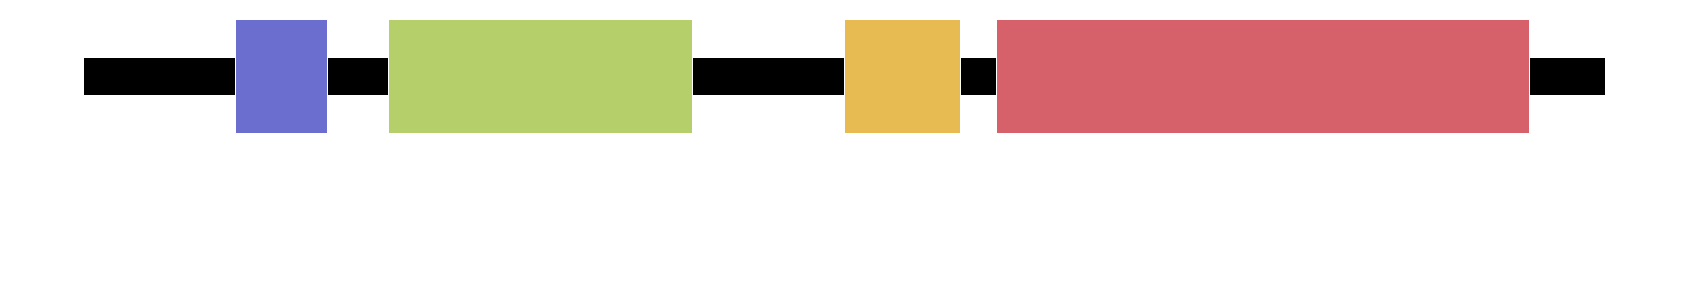

In [668]:
gene = GeneImage(total_span=1000,
                 exon_intervals=[[100,160],[200,400],[500,576],[600,950]],
                )
# save file
gene.save("gene_minimal")


## Example 2:
* position markers

File saved to:  gene_with_markers.eps


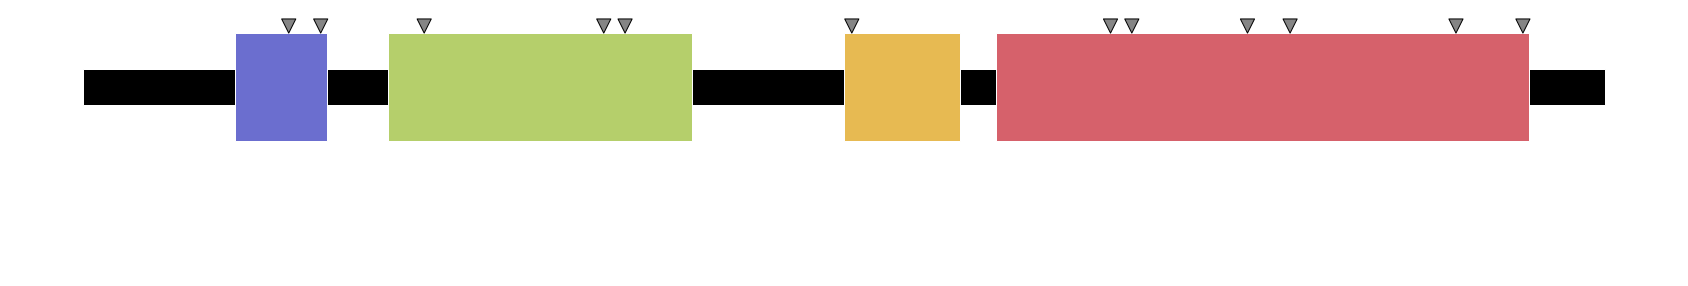

In [672]:
# PTEN (NM_001304717)
gene = GeneImage(total_span=1000,
                 exon_intervals=[[100,160],[200,400],[500,576],[600,950]],
                 marker_pos = [135,156,224,356,342,505,675,689,765,793,902,946],
                )
# save file
gene.save("gene_with_markers")


## Example 3:
* position markers with custom colors

File saved to:  gene_with_colored_markers.eps


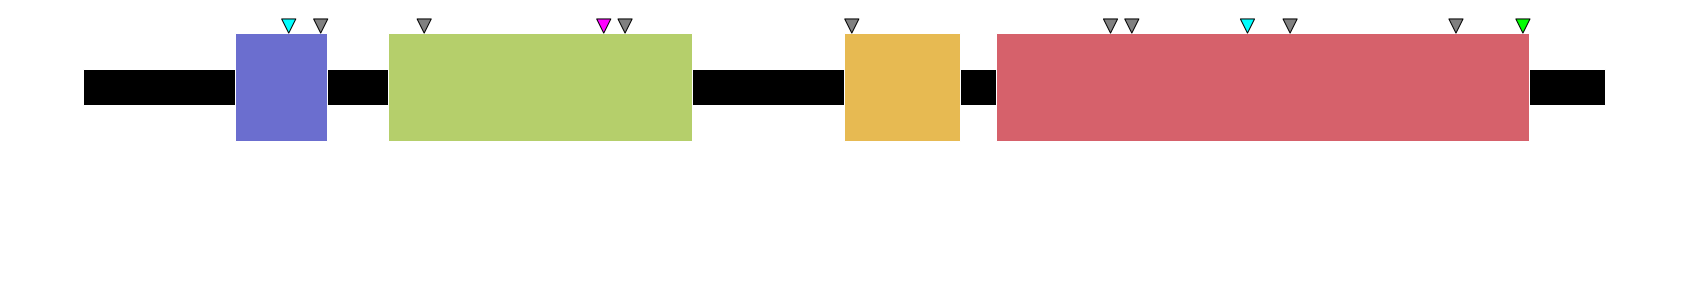

In [685]:
gene = GeneImage(total_span=1000,
                 exon_intervals=[[100,160],[200,400],[500,576],[600,950]],
                 marker_pos = [135,156,224,356,342,505,675,689,765,793,902,946],
                 marker_colors = ['cyan','grey', 'grey', 'grey','magenta', 'grey', 'grey', 'grey', 'cyan','grey', 'grey','lime'],
                )

# save file
gene.save("gene_with_colored_markers")

## Example 4:
* custom exon colors

File saved to:  gene_with_custom_exon_colors.eps


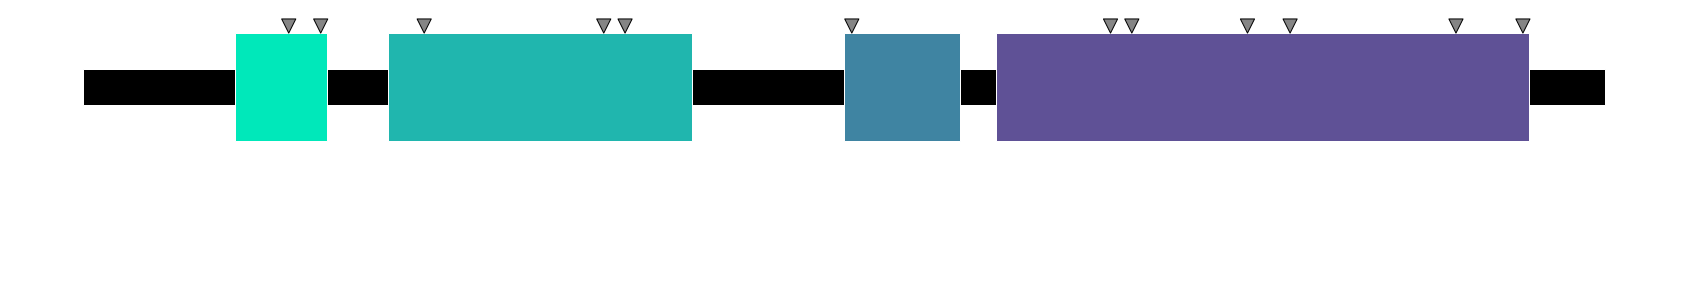

In [687]:
gene = GeneImage(total_span=1000,
                 exon_intervals=[[100,160],[200,400],[500,576],[600,950]],
                 exon_colors = ['#00e8ba', '#20b6ae', '#3f84a2', '#5f5196'],
                 marker_pos = [135,156,224,356,342,505,675,689,765,793,902,946],
                )
# save file
gene.save("gene_with_custom_exon_colors")

## Example 5:
* real gene
* markers indicate siRNA target positions that target mouse

File saved to:  PTEN_gene_colored_markers.eps


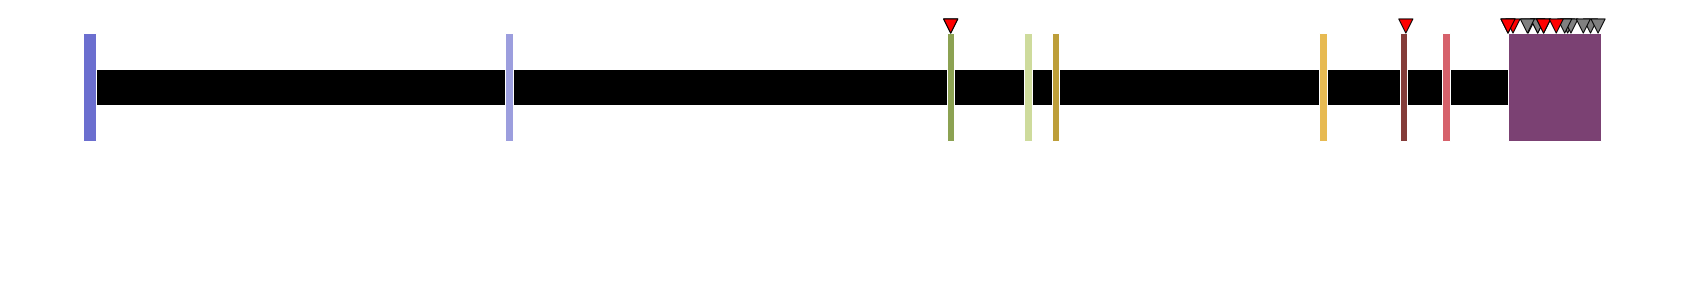

In [667]:
# PTEN (NM_001304717)
gene = GeneImage(total_span=abs(87863625-87971930), 
                 exon_intervals=[[1,924],[30401,30485],[61889,61933],[67422,67465],[69389,69627],[88494,88635],[94229,94395],[97270,97494],[101663,108306]],
                 marker_pos = [103117, 105933, 106169, 103796, 107565, 103795, 104223, 108104, 107051, 105724, 103060, 101676, 61904, 94386, 102034, 104216, 101677, 61905, 105120],
                 marker_colors = ['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey',
                                  'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red'
                                 ], # color those that target mouse
                )
# save file
gene.save("PTEN_gene_colored_markers")

## Example 6:
* Viral Genome
* position markers
* custom exon (gene) colors

File saved to:  mers-cov_genome.eps


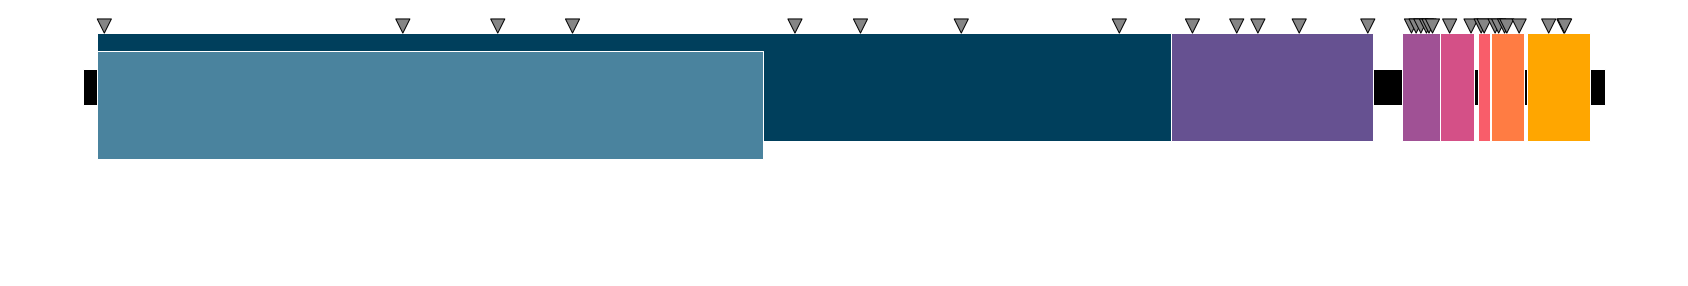

In [526]:
# MERS genome* (Accession: KT029139)
gene = GeneImage(total_span=30108, 
                 # *NOTE: this is missing exons [25852,26181] and [25532,25843], and exon [21516,25517] is actually [21456,25517]
                 exon_intervals=[[279,21514],[279,13454],[21516,25517],[26093,26833],[26840,27514],[27590,27838],[27853,28512],[28566,29807]], 
                 exon_colors=['#003f5c','#4a839e','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600'],
                 marker_pos=[416, 6322, 8200, 9679, 14080, 15376, 17370, 20497, 21944, 22820, 23239, 24056, 25413, 26277, 26369, 26463, 26573, 26624, 26693, 27032, 27455, 27656, 27715, 27932, 28002, 28119, 28163, 28407, 28992, 29292, 29307],
                )
# save file
gene.save("mers-cov_genome")


## Example 7:
* Viral Genome
* position markers
* custom exon (gene) colors
* position markers colored by homology


File saved to:  mers-cov_genome_colored_by_homology.eps


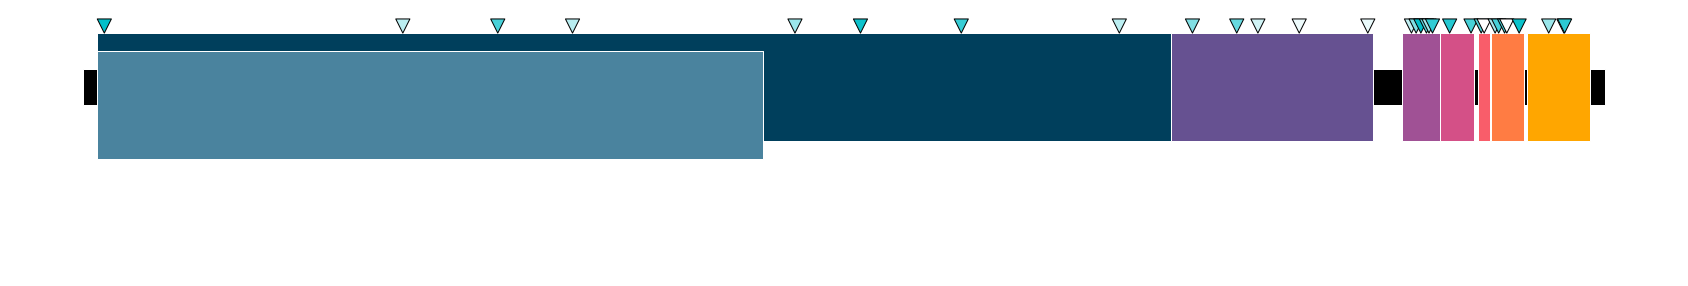

In [531]:
# MERS genome* (Accession: KT029139)
gene = GeneImage(total_span=30108, 
                 # *NOTE: this is missing exons [25852,26181] and [25532,25843], and exon [21516,25517] is actually [21456,25517]
                 exon_intervals=[[279,21514],[279,13454],[21516,25517],[26093,26833],[26840,27514],[27590,27838],[27853,28512],[28566,29807]], 
                 exon_colors=['#003f5c','#4a839e','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600'],
                 marker_pos=[416, 6322, 8200, 9679, 14080, 15376, 17370, 20497, 21944, 22820, 23239, 24056, 25413, 26277, 26369, 26463, 26573, 26624, 26693, 27032, 27455, 27656, 27715, 27932, 28002, 28119, 28163, 28407, 28992, 29292, 29307],
                 # homology_list: list of integers with values from 0 to 100 with 100 being highest homology 0 being no homology
                 homology_list = [97, 27, 70, 28, 39, 93, 77, 27, 49, 59, 19, 8, 9, 25, 50, 98, 62, 36, 79, 84, 71, 66, 1, 34, 71, 69, 1, 94, 40, 37, 81],
                )
# save file
gene.save("mers-cov_genome_colored_by_homology")


<a id='etc'></a>
# Additional Useful Methods

### Convert siRNA target positions to Genomic Positions

In [472]:
def get_genomic_positions(exon_intervals,marker_pos):
    ''' 
    Converts siRNA target positions to genomic positions
    
    Inputs:
        exon_intervals 
            list of exon intervals (2D list of integers)
        marker_pos
            list of marker positions (list of integers)
    '''
    coding_intervals = [[1,abs(exon_intervals[0][0]-exon_intervals[0][-1])]] # add first exon 
    for e in exon_intervals[1:]: # skip first exon
        diff = abs(e[0]-e[-1])
        coding_intervals.append([coding_intervals[-1][-1]+1,diff+(coding_intervals[-1][-1]+1)])


    # for each marker position, determines which exon it belongs to then adds the appropriate distance in genomic DNA sequence
    genomic_marker_pos = []
    for m in marker_pos:
        i=0
        while i<len(coding_intervals):
            if (m>=coding_intervals[i][0] and m<=coding_intervals[i][-1]):
                # it is in this exon
                genomic_marker_pos.append(exon_intervals[i][0]-coding_intervals[i][0]+m)
                i=len(coding_intervals)
            i+=1

    if (len(genomic_marker_pos ) != len(marker_pos)):
        print("ERROR: there was an issue converting genomic and marker positions")
    
    print("Genomic marker positions:")
    print(genomic_marker_pos)

get_genomic_positions(exon_intervals=[[1,924],[30401,30485],[61889,61933],[67422,67465],[69389,69627],[88494,88635],[94229,94395],[97270,97494],[101663,108306]],
                      marker_pos = [3325, 6141, 6377, 4004, 7773, 4003, 4431, 8312, 7259, 5932, 3268, 1884, 1024, 1636, 2242, 4424, 1885, 1025, 5328]
                     )


Genomic marker positions:
[103117, 105933, 106169, 103796, 107565, 103795, 104223, 108104, 107051, 105724, 103060, 101676, 61904, 94386, 102034, 104216, 101677, 61905, 105120]


[Return to Top of Page](#top)